In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Error handling for loading the dataset
try:
    iris = load_iris(as_frame=True)
    df = iris.frame
    print("Dataset loaded successfully.\n")
except Exception as e:
    print("Error loading dataset:", e)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check data types and missing values
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

# Clean data (no missing values in Iris, but here's how you would handle them)
df.dropna(inplace=True)  # or df.fillna(method='ffill', inplace=True)


Dataset loaded successfully.

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Data Types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [3]:
# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Grouping by species and computing mean of each feature
grouped = df.groupby('target').mean()
print("\nMean values per species (target):")
print(grouped)

# Mapping target to actual species names
df['species'] = df['target'].map(dict(zip(range(3), iris.target_names)))

# Grouping by species
print("\nMean values per species (with names):")
print(df.groupby('species').mean())



Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Mean values per species (target):
        sepa

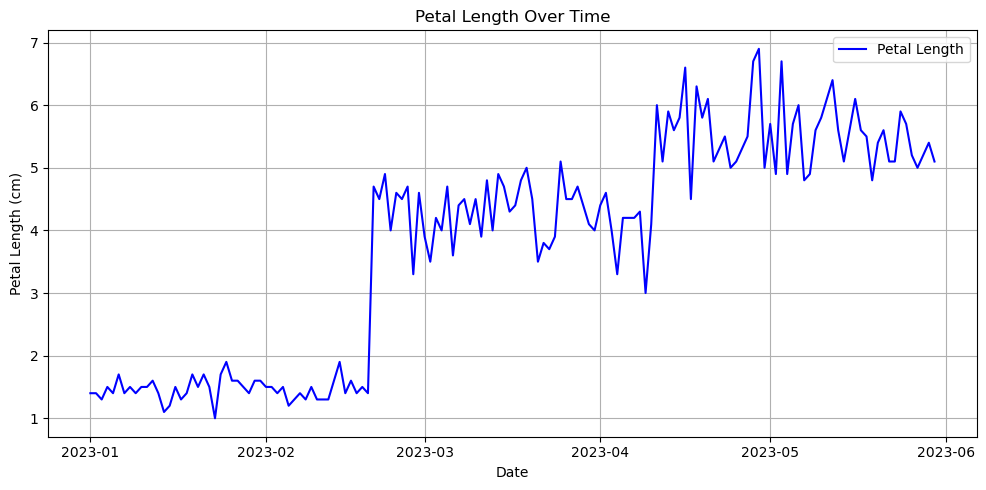

In [4]:
# Simulate time series data
df['time'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['petal length (cm)'], label='Petal Length', color='blue')
plt.title('Petal Length Over Time')
plt.xlabel('Date')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\chebe\AppData\Local\Temp\ipykernel_10264\1225448854.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='Set2')


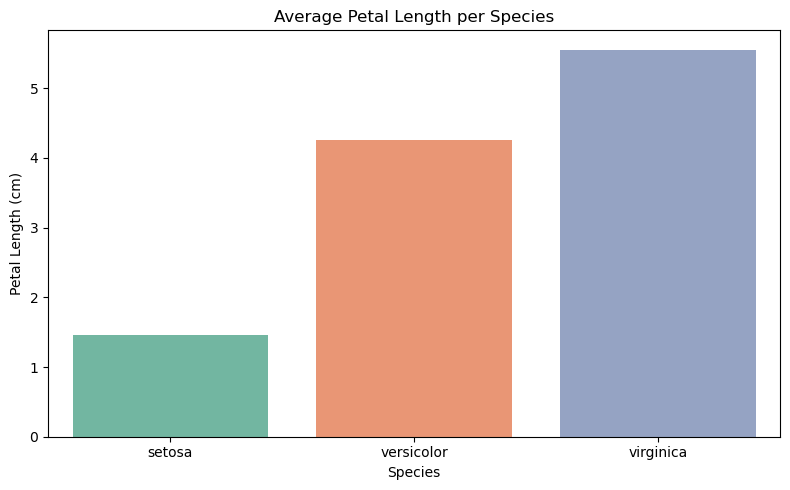

In [5]:
plt.figure(figsize=(8, 5))
sns.barplot(x='species', y='petal length (cm)', data=df, ci=None, palette='Set2')
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.tight_layout()
plt.show()


C:\Users\chebe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


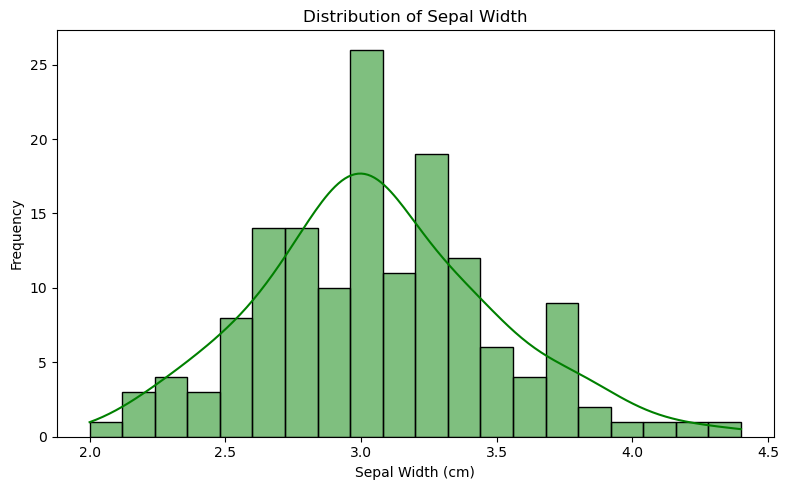

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sepal width (cm)'], bins=20, kde=True, color='green')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
